In [1]:
#general packages
import pandas as pd
import numpy as np
from collections import Counter
import tifffile as tf
from skimage.measure import regionprops
#plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
#custom function
from post_analysis import *
%config InlineBackend.figure_format='retina'

In [47]:
#for across channel
mtx = pd.read_csv(f"/groups/CaiLab/personal/Lex/raw/230521_10k_human_AD/pyfish_tools/output/genebycell/high_thresh_no_zmatched_nomedian/final_11.51.5_seed44_heg_svm_p15.0_diff1_fdr20.0/final/genebycell.csv", index_col=0)

In [48]:
#take a look
mtx

,Cell1.0_Pos_0,Cell5.0_Pos_0,Cell6.0_Pos_0,Cell7.0_Pos_0,Cell8.0_Pos_0,Cell9.0_Pos_0,Cell11.0_Pos_0,Cell12.0_Pos_0,Cell13.0_Pos_0,Cell14.0_Pos_0,...,Cell54.0_Pos_34,Cell56.0_Pos_34,Cell58.0_Pos_34,Cell59.0_Pos_34,Cell60.0_Pos_34,Cell61.0_Pos_34,Cell62.0_Pos_34,Cell63.0_Pos_34,Cell64.0_Pos_34,Cell65.0_Pos_34
aqr,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
asxl1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fake5315,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fake5458,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fake5555,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fake8136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
fake95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
fake4153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
fake4681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
#codebook
c=4
codebooks = ["codebook_string_647.csv","codebook_string_561.csv","codebook_string_488.csv", "codebook_string.csv"]
codebook = pd.read_csv(f"/groups/CaiLab/personal/Lex/raw/230521_10k_human_AD/barcode_key/{codebooks[c-1]}", index_col=0)
#separate into true and false codebook
fakebook = codebook[codebook.index.str.startswith("fake")]
codebook = codebook.drop(fakebook.index)

/central/groups/CaiLab/personal/Lex/raw/230521_10k_human_AD/pyfish_tools/scripts/post_analysis_scripts/post_analysis.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  norm_false_positive_rate = false_positive_counts/N_on


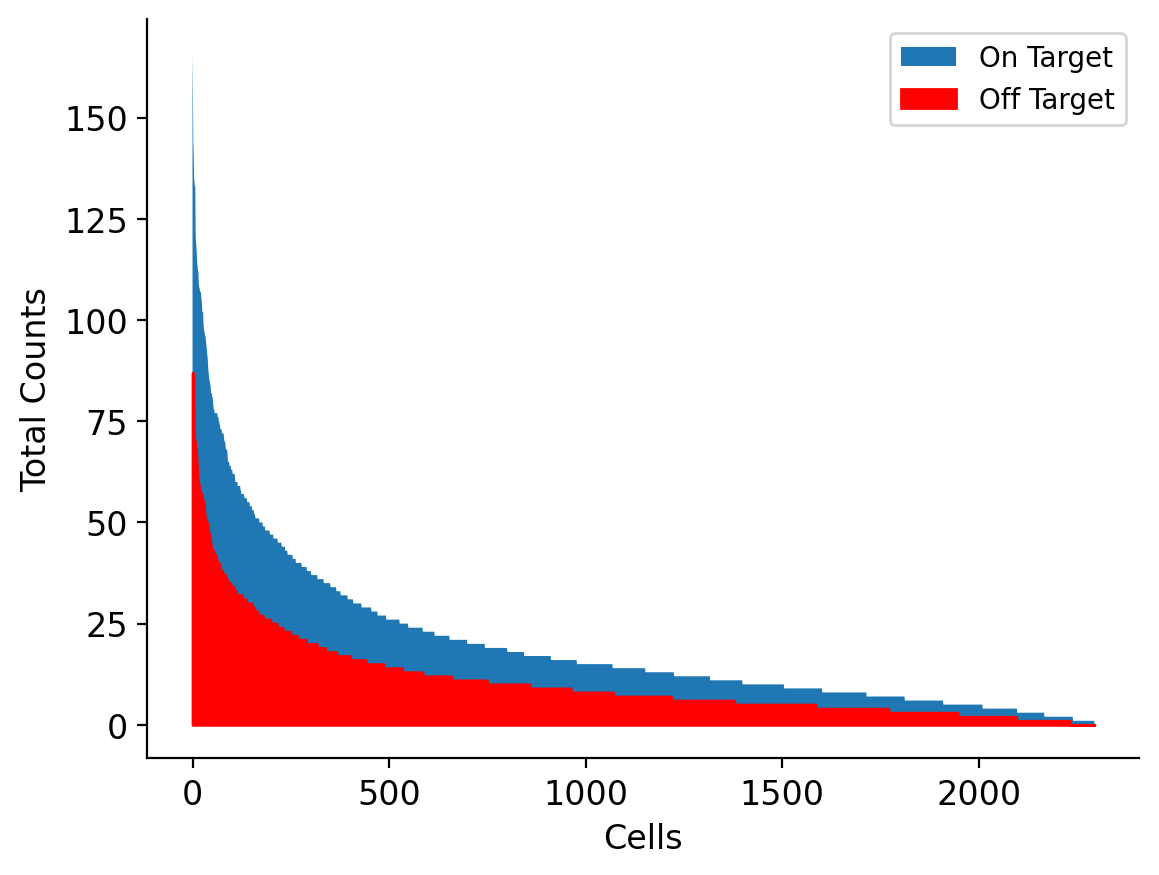

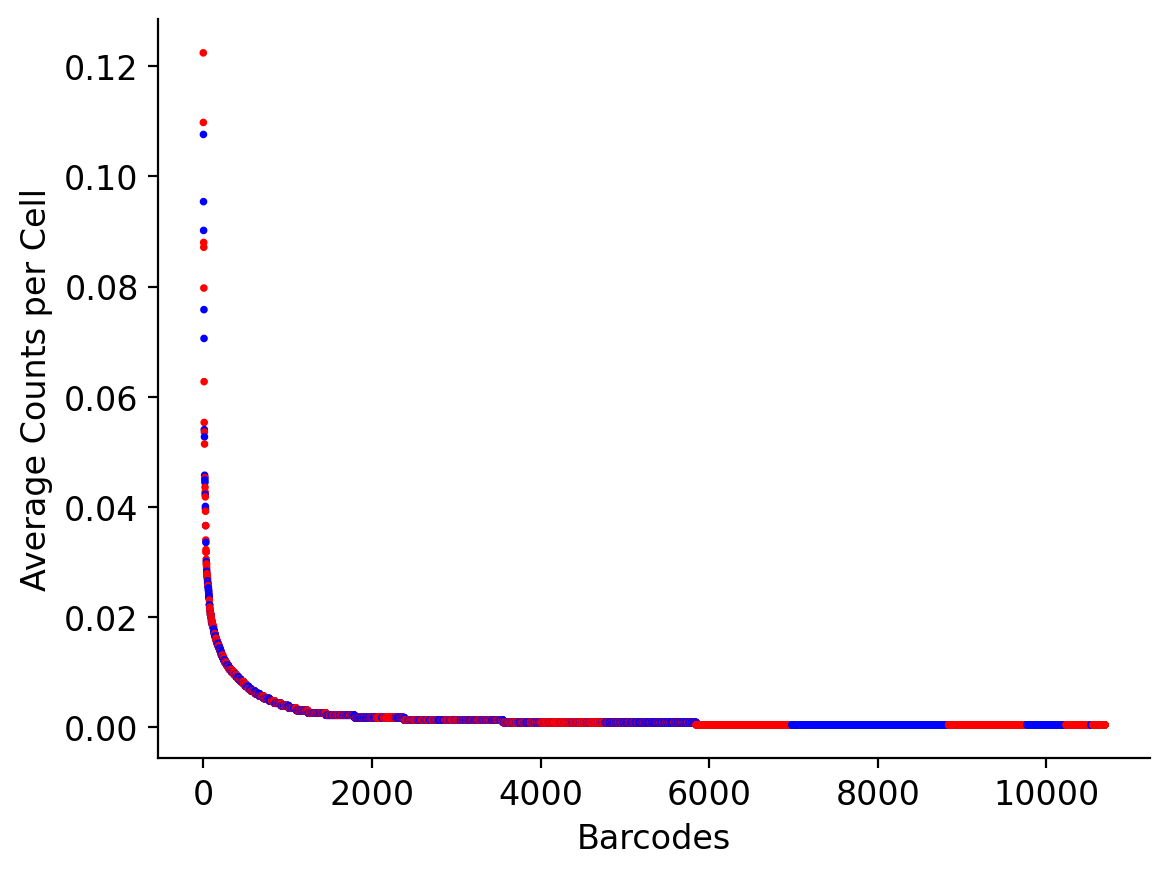

In [50]:
#calculate fdr
fp, fake = percent_false_positive(mtx, codebook, fakebook)
percent_fp = fp["FP raw"].mean()
mean_counts = fp["total_real"].mean()
sum_counts = fp["total_counts"].sum()
norm_fpr = fp["FDR"].mean()
fp_list = [percent_fp,norm_fpr,mean_counts,sum_counts]

In [51]:
#take a look at fdr results
df_stats = pd.DataFrame(fp_list).T
df_stats.columns = ["percent fp","false positive rate","mean true counts", "total sum"]
df_stats

,percent fp,false positive rate,mean true counts,total sum
0,0.529115,inf,9.272331,45259.0


# Percent decoded

In [52]:
#get average percent decoded
percent_decoded_list = []
for i in range(52):
    for z in range(1):
        try:
            src = f""
            with open(src) as f:
                decoded = f.readlines()[0].split(" ")[-1]
                f.close()
                percent_decoded_list.append(float(decoded))
        except FileNotFoundError:
            continue

In [53]:
np.mean(percent_decoded_list)

/home/kcolon/miniconda3/envs/python3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/kcolon/miniconda3/envs/python3.7/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

# Single-Cell Analysis

In [54]:
#analysis packages
import pandas as pd
import numpy as np
import scanpy as sc
import anndata
import scrublet as scr
from sklearn.linear_model import LinearRegression
import scipy.stats as st
import gseapy as gp

#plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

%config InlineBackend.figure_format = 'retina'

According to Booeshaghi et al,  proportional fitting prior to log transformation followed by an additional proportional fitting is best for normalization (ref 1). 

ref 1: https://www.biorxiv.org/content/10.1101/2022.05.06.490859v1

Another source from Ahlmann-Eltze, says that the logarithm of a pseudo-count followed by principal-component analysis, performs as well or better than the more sophisticated alternatives

ref 2: https://www.nature.com/articles/s41592-023-01814-1

Do to these reasons, I'm just going to proceed with PFLogPF for normalization instead of sctransform or LogCP10k.

In [55]:
#--------------------------------------------
import scipy as sp
#from ref 1
def do_pf(mtx, sf = None):
    pf = mtx.sum(axis=1).ravel()
    if not sf:
        sf = pf.mean()
    pf = sp.sparse.diags(sf/pf) @ mtx
    return pf

def norm_pf_log_pf(mtx):
    pf_log_pf = do_pf(np.log1p(do_pf(mtx)))
    return pf_log_pf
#--------------------------------------------

In [56]:
mtx = mtx[~mtx.index.str.startswith("fake")]

In [57]:
adata = sc.AnnData(mtx.T, dtype=mtx.values.dtype)

In [58]:
#This filters cells based on minimal UMI counts. 
sc.pp.filter_cells(adata, min_counts = 5)

In [59]:
#This filters genes based on minimal number of counts
sc.pp.filter_genes(adata, min_counts = 5)

In [60]:
np.median(adata.var['n_counts'])

10.0

In [61]:
adata.X = norm_pf_log_pf(adata.X.T).T

In [62]:
adata

AnnData object with n_obs × n_vars = 1452 × 779
    obs: 'n_counts'
    var: 'n_counts'

/home/kcolon/.local/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


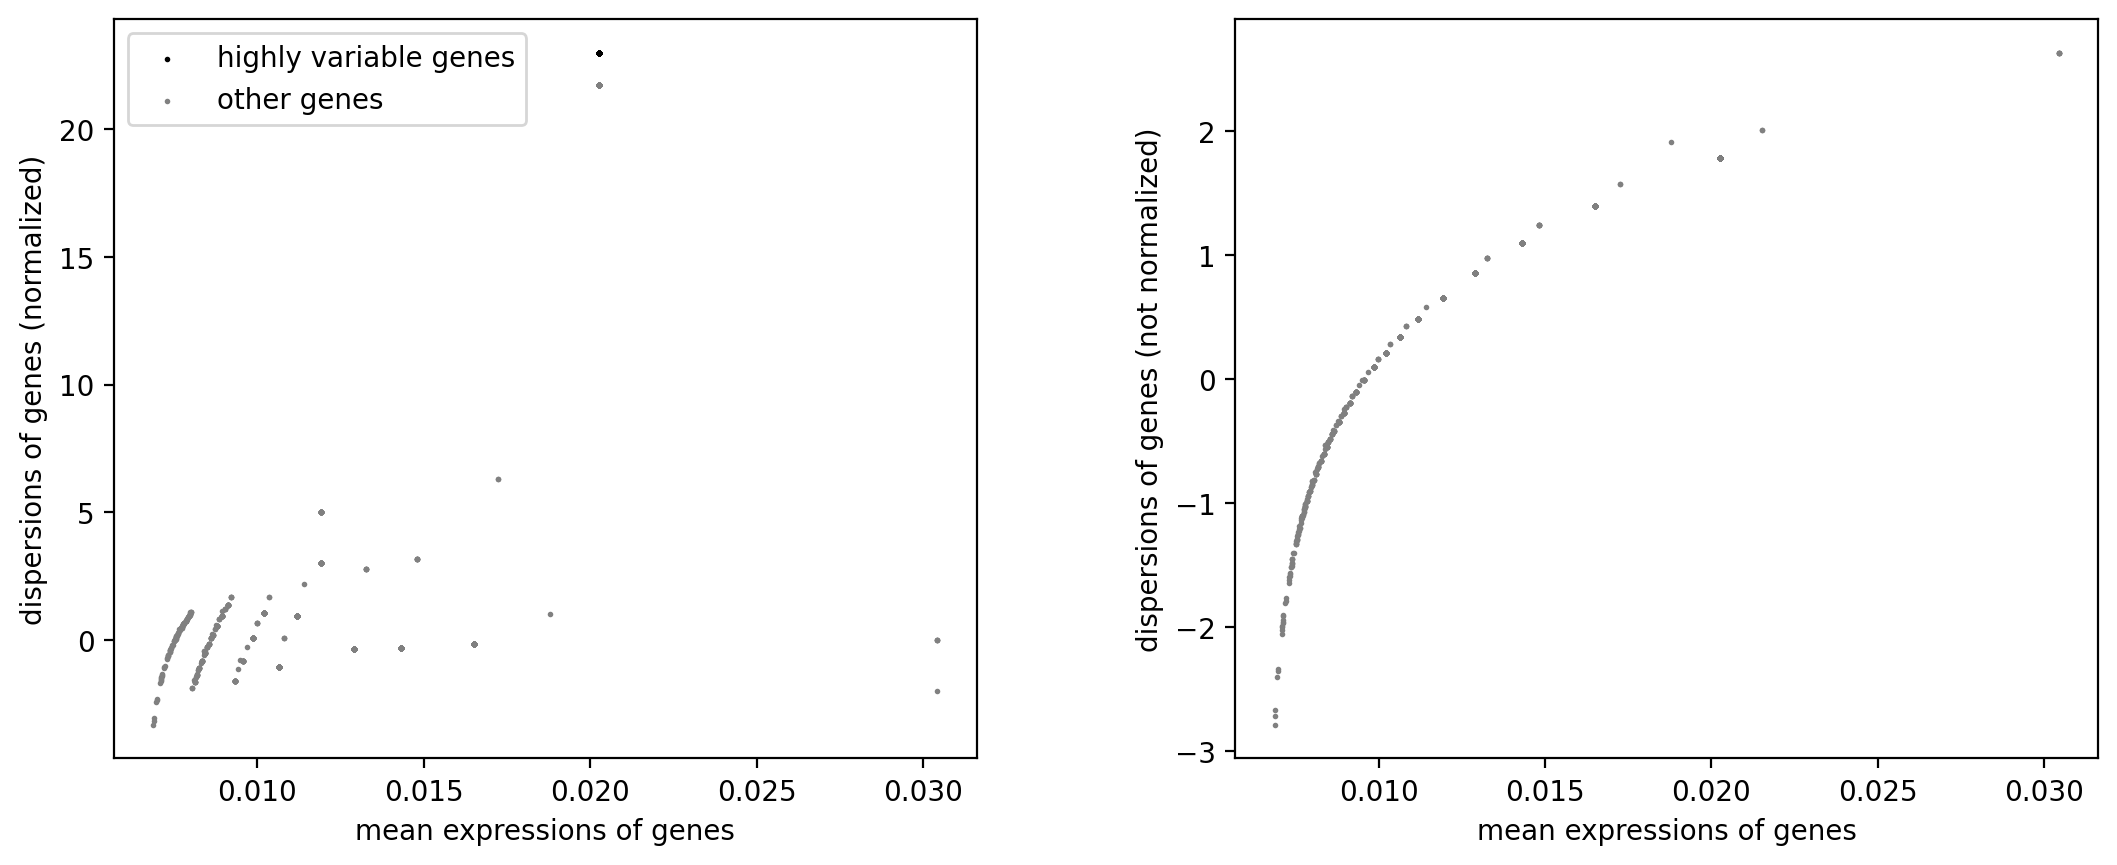

In [63]:
#find highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.01, max_mean=8,
                            min_disp=1, n_top_genes=10, n_bins=20, flavor="seurat")
sc.pl.highly_variable_genes(adata)

In [64]:
#mean center data and divide by std
sc.pp.scale(adata, max_value=10)

In [65]:
#perform UMAP
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=True, n_comps=20)
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=20, knn=True)
sc.tl.umap(adata)

In [66]:
#unsupervised clustering with leiden
sc.tl.leiden(adata, resolution = 0.5)

In [72]:
adata.var

,n_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
asxl1,24.0,False,0.008304,-0.624219,-0.898013,0.006673,0.053071
kcnip3,6.0,False,0.016503,1.389556,-0.157147,0.006673,0.103625
p2rx2,9.0,False,0.011919,0.654327,3.000000,0.006673,0.084522
lyg2,26.0,False,0.008054,-0.812394,-1.896391,0.006673,0.049434
mccc1,34.0,False,0.007746,-1.070898,0.548225,0.006673,0.044098
...,...,...,...,...,...,...,...
hs3st3a1,6.0,False,0.016503,1.389556,-0.157147,0.006673,0.103625
arid5a,5.0,False,0.030433,2.628728,0.000000,0.006673,0.128541
apof,6.0,False,0.016503,1.389556,-0.157147,0.006673,0.103625
kras,5.0,False,0.020259,1.779501,21.710487,0.006673,0.113555


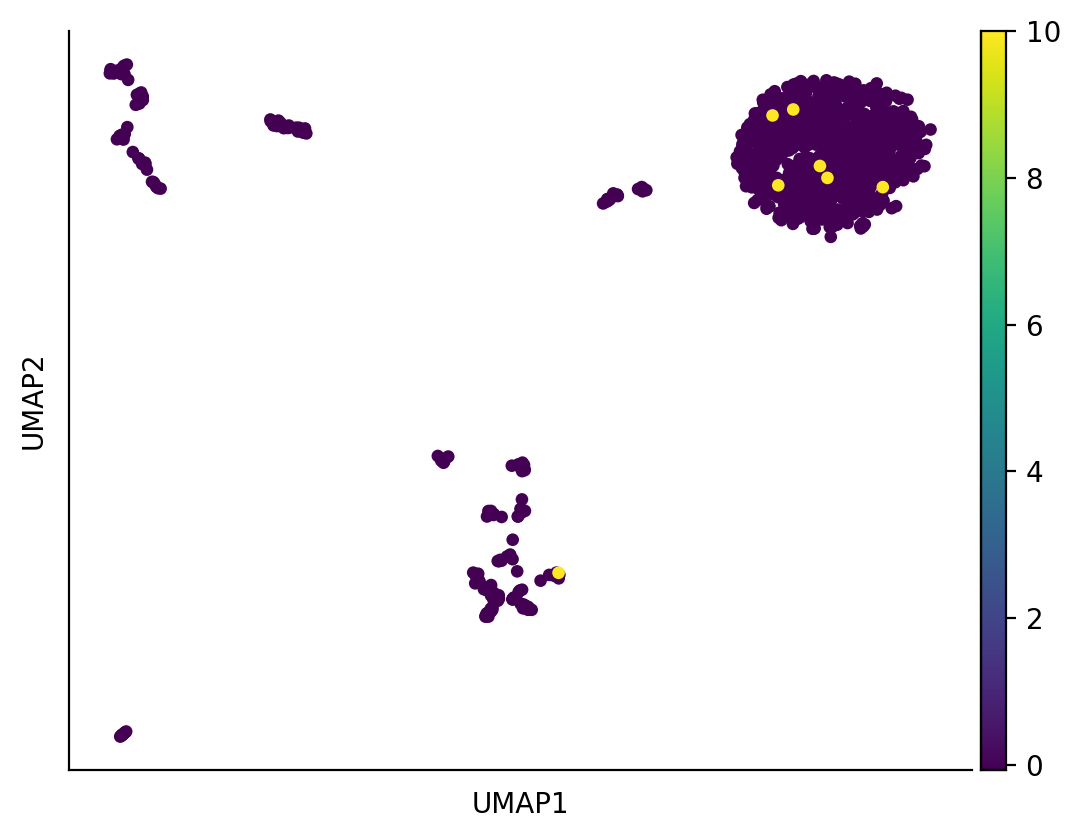

In [82]:
#visualize plot
sc.pl.umap(adata, color="slc17a7", title = "", show = False)
sns.despine()
plt.show()

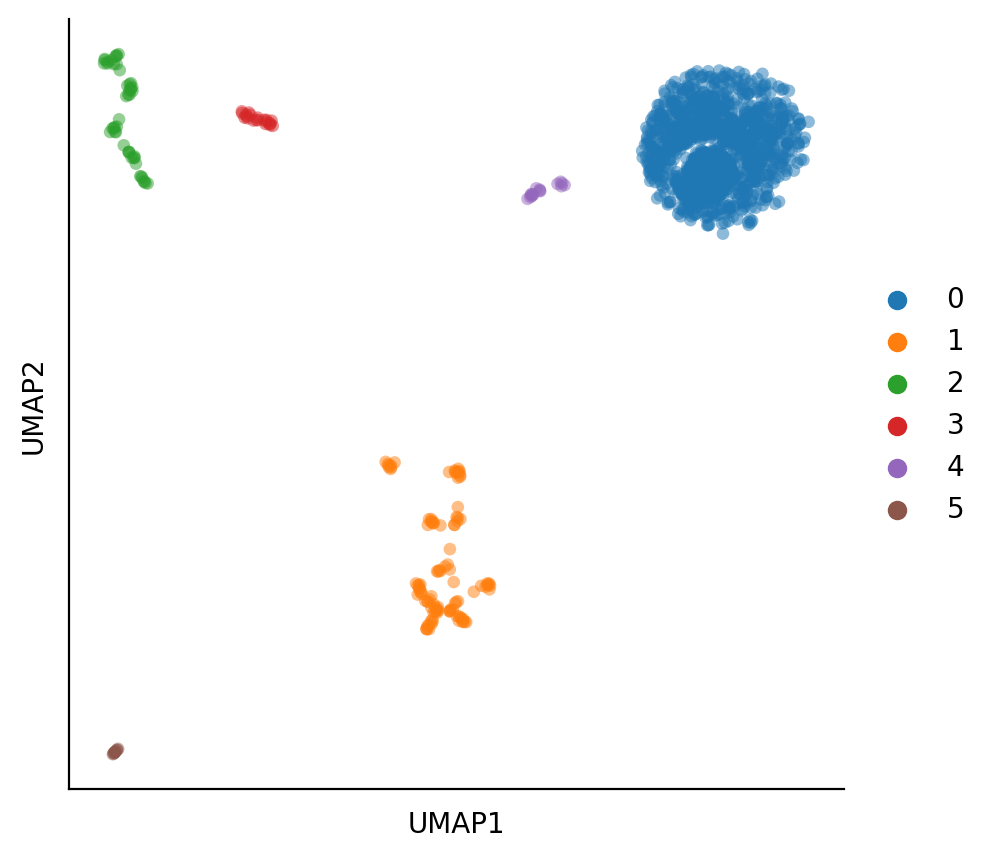

In [97]:
#visualize plot
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

sc.pl.umap(adata, color="leiden", title = "", show = False, alpha=0.5)
sns.despine()
plt.show()

In [69]:
markers = pd.read_csv("/groups/CaiLab/personal/Lex/raw/230521_10k_human_AD/top25_cluster-markers_2023_0524.csv")

In [112]:
sc.tl.rank_genes_groups(adata,'leiden', method='wilcoxon')
groups = sc.get.rank_genes_groups_df(adata, None)

In [121]:
types = markers.cluster.unique()

In [131]:
markers

,Unnamed: 0,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
0,1,6.801218e-129,2.004422,0.959,0.364,9.338072e-126,eN,SLC17A7
1,2,1.983985e-110,1.791817,0.952,0.428,2.724012e-107,eN,CHN1
2,3,1.509406e-92,1.538842,0.995,0.736,2.072414e-89,eN,VSNL1
3,4,3.209102e-87,1.673977,0.920,0.420,4.406097e-84,eN,SNAP25
4,5,1.318302e-82,1.498610,0.941,0.464,1.810028e-79,eN,UCHL1
...,...,...,...,...,...,...,...,...
170,171,2.154776e-37,0.574008,0.320,0.033,2.958507e-34,Mic,SELPLG
171,172,1.295217e-33,0.805797,0.478,0.179,1.778332e-30,Mic,BHLHE41
172,173,6.400910e-28,0.667126,0.368,0.115,8.788449e-25,Mic,CTSB
173,174,3.437752e-26,0.639035,0.240,0.016,4.720033e-23,Mic,CD163


In [148]:
cluster_def = []
for uni in range(len(groups.group.unique())):
    cls = groups[groups.group == str(uni)]
    celltype = []
    for cell in types:
        genes = markers[markers.cluster == cell].gene.values
        genes = [gene.lower() for gene in genes]
        overlap = len(set(cls.names.values) & set(genes))
        celltype.append([cell, overlap/len(genes)])
    celltype = np.array(celltype)
    best = np.argmax(celltype[:,1].astype(float))
    cluster_def.append([uni, celltype[best]])

In [151]:
cluster_def

[[0, array(['eN', '0.08'], dtype='<U32')],
 [1, array(['eN', '0.08'], dtype='<U32')],
 [2, array(['eN', '0.08'], dtype='<U32')],
 [3, array(['eN', '0.08'], dtype='<U32')],
 [4, array(['eN', '0.08'], dtype='<U32')],
 [5, array(['eN', '0.08'], dtype='<U32')]]

# Doublet detection (if masks were too big)

In [ ]:
#perform scrublet modeling 
#use unnormalized counts matrix
scrub = scr.Scrublet(genes_tpt_live_unnorm.X, expected_doublet_rate = 0.08)

In [ ]:
#calculate doublet scores
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=1, 
                                                          min_cells=1,
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=50,
                                                         )

In [ ]:
#add labels normalized matrix
genes_tpt_live.obs["scrublet"] = predicted_doublets

In [ ]:
#color by scrublet doublet
sc.pl.umap(genes_tpt_live, color="scrublet", cmap = "viridis", show = False)
sns.despine()

In [ ]:
#remove doublets
genes_tpt_live = genes_tpt_live[genes_tpt_live.obs["scrublet"] == False]